In [2]:

import sys

import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('/code/src')
from helper import df_ann_test, sr_num_frames_test

from pathlib import Path

from tqdm.auto import tqdm

In [3]:
# 비디오
# Normal 비디오의 아무 세그먼트
# Anomaly 비디오의 non-anomaly 세그먼트
# Anomaly 비디오의 anomaly 세그먼트

# 텍스트
# normal 텍스트
# anomaly 텍스트

In [4]:
p_embedding_text_normal = Path('/code/output/psuedo-captions/gpt-4o/00-rich-context/embeddings/imagebind/embs_normal.npy')
p_embedding_text_anomaly = Path('/code/output/psuedo-captions/gpt-4o/00-rich-context/embeddings/imagebind/embs_anomalous.npy')
embeddings_text_normal = np.load(p_embedding_text_normal)[:1000]
embeddings_text_anomaly = np.load(p_embedding_text_anomaly)[:1000]

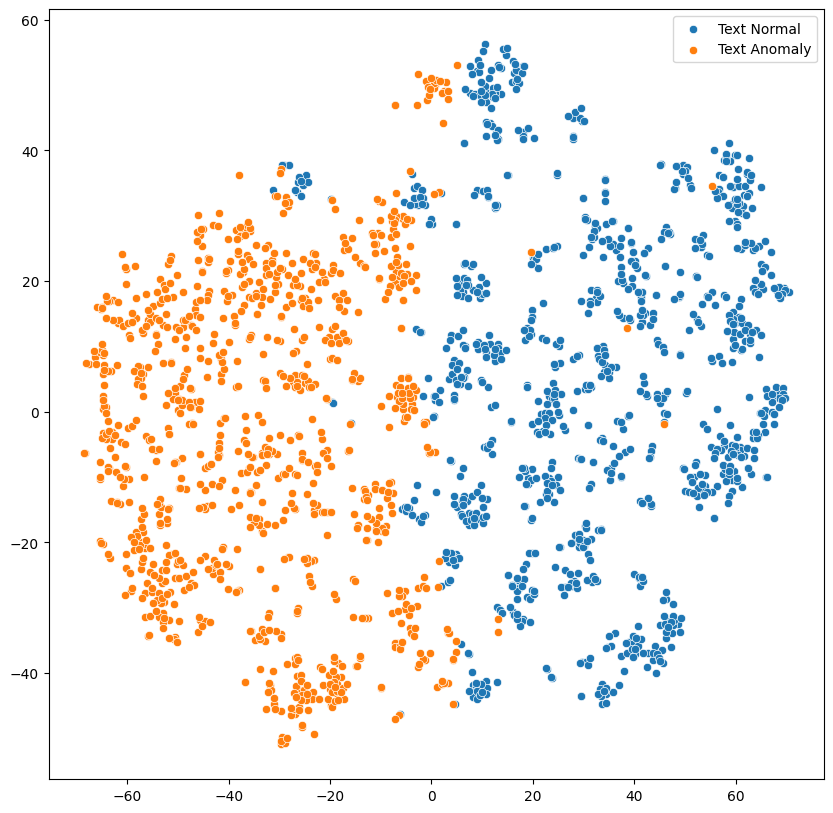

In [5]:
np.random.seed(0)
tsne = TSNE(n_components=2, perplexity=30, max_iter=5000, init='pca', metric='cosine')
e = np.concatenate([
    embeddings_text_normal,
    embeddings_text_anomaly], axis=0)
ee = tsne.fit_transform(e)

a, b = len(embeddings_text_normal), len(embeddings_text_anomaly)
bdds = [a, a+b]

plt.figure(figsize=(10, 10))
sns.scatterplot(x=ee[:bdds[0], 0], y=ee[:bdds[0], 1], label='Text Normal')
sns.scatterplot(x=ee[bdds[0]:bdds[1], 0], y=ee[bdds[0]:bdds[1], 1], label='Text Anomaly')
plt.legend()
plt.show()

In [6]:
df_tmp = df_ann_test.join(sr_num_frames_test, on='raw_rel_video_path')
df_tmp['seg_s1'] = df_tmp['s1'] // 8
df_tmp['seg_e1'] = df_tmp['e1'] // 8
df_tmp['seg_s2'] = df_tmp['s2'] // 8
df_tmp['seg_e2'] = df_tmp['e2'] // 8
df_tmp.index = df_tmp['rel_video_path']
display(df_tmp)

,video,label,s1,e1,s2,e2,raw_label,raw_rel_video_path,rel_video_path,num_frames,seg_s1,seg_e1,seg_s2,seg_e2
rel_video_path,,,,,,,,,,,,,,
Abuse/Abuse028_x264.mp4,Abuse028_x264.mp4,Abuse,165,240,-1,-1,Abuse,Abuse/Abuse028_x264.mp4,Abuse/Abuse028_x264.mp4,1412,20,30,-1,-1
Abuse/Abuse030_x264.mp4,Abuse030_x264.mp4,Abuse,1275,1360,-1,-1,Abuse,Abuse/Abuse030_x264.mp4,Abuse/Abuse030_x264.mp4,1544,159,170,-1,-1
Arrest/Arrest001_x264.mp4,Arrest001_x264.mp4,Arrest,1185,1485,-1,-1,Arrest,Arrest/Arrest001_x264.mp4,Arrest/Arrest001_x264.mp4,2374,148,185,-1,-1
Arrest/Arrest007_x264.mp4,Arrest007_x264.mp4,Arrest,1530,2160,-1,-1,Arrest,Arrest/Arrest007_x264.mp4,Arrest/Arrest007_x264.mp4,3144,191,270,-1,-1
Arrest/Arrest024_x264.mp4,Arrest024_x264.mp4,Arrest,1005,3105,-1,-1,Arrest,Arrest/Arrest024_x264.mp4,Arrest/Arrest024_x264.mp4,3629,125,388,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vandalism/Vandalism007_x264.mp4,Vandalism007_x264.mp4,Vandalism,240,750,-1,-1,Vandalism,Vandalism/Vandalism007_x264.mp4,Vandalism/Vandalism007_x264.mp4,1146,30,93,-1,-1
Vandalism/Vandalism015_x264.mp4,Vandalism015_x264.mp4,Vandalism,2010,2700,-1,-1,Vandalism,Vandalism/Vandalism015_x264.mp4,Vandalism/Vandalism015_x264.mp4,2982,251,337,-1,-1
Vandalism/Vandalism017_x264.mp4,Vandalism017_x264.mp4,Vandalism,270,330,780,840,Vandalism,Vandalism/Vandalism017_x264.mp4,Vandalism/Vandalism017_x264.mp4,1011,33,41,97,105


In [7]:
p_embeddings_rootdir = Path('/code/output/psuedo-captions/gpt-4o/00-rich-context/embeddings/imagebind/dur=1.0_ol=0.5_fs=16/segments')
embeddings_normal, embeddings_anomaly = [], []
for p_emb in tqdm(sorted(p_embeddings_rootdir.glob('**/*.npy'))):
    rel_video_path = '/'.join(p_emb.parts[-3:-1]) + '.mp4'
    seg_s1, seg_e1, seg_s2, seg_e2 = df_tmp.loc[rel_video_path, ['seg_s1', 'seg_e1', 'seg_s2', 'seg_e2']].values
    seg_id = int(p_emb.stem)
    if seg_s1 <= seg_id <= seg_e1 or seg_s2 <= seg_id <= seg_e2:
        embeddings_anomaly.append(np.load(p_emb))
    else:
        embeddings_normal.append(np.load(p_emb))

  0%|          | 0/73696 [00:00<?, ?it/s]

In [11]:
emb_normal_mean = embeddings_text_normal.mean(axis=0)
emb_normal_mean /= np.linalg.norm(emb_normal_mean)
emb_anomalous_mean = embeddings_text_anomaly.mean(axis=0)
emb_anomalous_mean /= np.linalg.norm(emb_anomalous_mean)
emb_proj = emb_anomalous_mean - emb_normal_mean
emb_proj /= np.linalg.norm(emb_proj)
emb_proj = emb_proj.astype(np.float32)

In [8]:
len(embeddings_normal), len(embeddings_anomaly)

(68394, 5302)

In [12]:
embeddings_normal_subsampled = embeddings_normal[::len(embeddings_normal)//1000]
embeddings_anomaly_subsampled = embeddings_anomaly[::len(embeddings_anomaly)//1000]

embeddings_normal_subsampled -= np.einsum('i,j,hj->hi', emb_proj, emb_proj, embeddings_normal_subsampled)
embeddings_anomaly_subsampled -= np.einsum('i,j,hj->hi', emb_proj, emb_proj, embeddings_anomaly_subsampled)

In [13]:
np.random.seed(0)
tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, init='pca', metric='cosine')
e = np.concatenate([
    embeddings_text_normal,
    embeddings_text_anomaly,
    embeddings_normal_subsampled,
    embeddings_anomaly_subsampled,
], axis=0)
ee = tsne.fit_transform(e)

a, b, c, d = len(embeddings_text_normal), len(embeddings_text_anomaly), len(embeddings_normal_subsampled), len(embeddings_anomaly_subsampled)
bdds = [a, a+b, a+b+c, a+b+c+d]

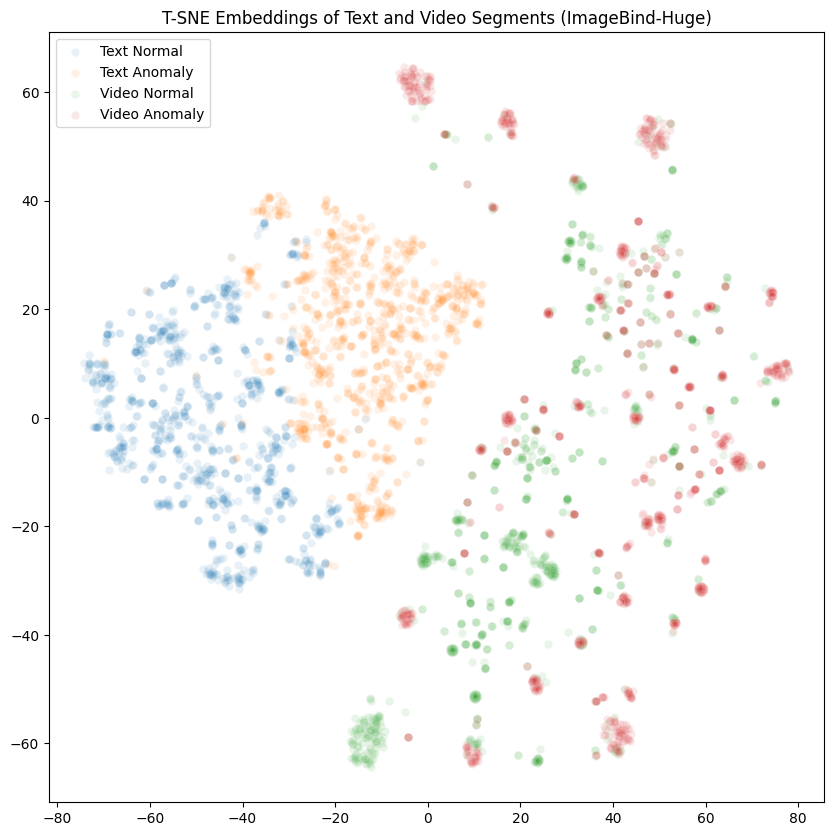

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=ee[:bdds[0], 0], y=ee[:bdds[0], 1], label='Text Normal', alpha=.1)
sns.scatterplot(x=ee[bdds[0]:bdds[1], 0], y=ee[bdds[0]:bdds[1], 1], label='Text Anomaly', alpha=.1)
sns.scatterplot(x=ee[bdds[1]:bdds[2], 0], y=ee[bdds[1]:bdds[2], 1], label='Video Normal', alpha=.1)
sns.scatterplot(x=ee[bdds[2]:bdds[3], 0], y=ee[bdds[2]:bdds[3], 1], label='Video Anomaly', alpha=.1)
plt.legend()
plt.title('T-SNE Embeddings of Text and Video Segments (ImageBind-Huge)')
plt.show()